# Интегрирование и Интерполяция: Площади и Плавные кривые

В этом разделе мы рассмотрим еще два мощных численных метода, которые помогают решать задачи, когда точной формулы нет или она слишком сложна.

## Численное интегрирование: Считаем площадь по кусочкам

Представьте, что вам нужно найти площадь под сложной кривой, например, под графиком нормального распределения. Аналитически (с помощью формул) этот интеграл не берется. Что делать?

> **Численное интегрирование — это способ найти приближенную площадь под кривой, разбив ее на множество маленьких, простых фигур (прямоугольников или трапеций) и сложив их площади.**

Чем больше (и уже) этих простых фигур, тем точнее будет наш результат. Это основа **метода прямоугольников** и **метода трапеций**.

### Интерактивная демонстрация

Давайте посчитаем площадь под кривой $f(x) = x \cdot \sin(x^2) + 5$ на отрезке от 1 до 4.

**Поиграйте со слайдером `n_rectangles`**, чтобы увидеть, как увеличивается точность аппроксимации с ростом количества прямоугольников.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from ipywidgets import interact, IntSlider

plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
# Наша сложная функция
def f(x):
    return x * np.sin(x**2) + 5

# Диапазон для графика
x_curve = np.linspace(0, 5, 200)
y_curve = f(x_curve)

# Функция для интерактивной визуализации
def plot_integration(n_rectangles):
    plt.figure(figsize=(12, 7))
    # Рисуем саму кривую
    plt.plot(x_curve, y_curve, 'b-', linewidth=2, label='f(x)')

    # Границы интегрирования
    x_min, x_max = 1, 4

    # --- Метод прямоугольников (по левым точкам) ---
    x_rect = np.linspace(x_min, x_max, n_rectangles, endpoint=False)
    # Ширина каждого прямоугольника
    width = (x_max - x_min) / n_rectangles
    # Высота - значение функции в левой точке
    heights = f(x_rect)

    # Рисуем прямоугольники
    plt.bar(x_rect, heights, width=width, align='edge', alpha=0.5, color='orange', label=f'{n_rectangles} прямоугольников')

    # Считаем приближенную площадь
    approximated_area = np.sum(heights * width)

    plt.title(f'Численное интегрирование (Метод прямоугольников)\nПриближенная площадь ≈ {approximated_area:.4f}')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.show()

# Создаем слайдер
interact(
    plot_integration,
    n_rectangles=IntSlider(min=1, max=100, step=1, value=5, description='Кол-во прямоугольников')
);

interactive(children=(IntSlider(value=5, description='Кол-во прямоугольников', min=1), Output()), _dom_classes…

Чем больше прямоугольников, тем меньше 'пустых' и 'лишних' областей, и тем ближе наша оценка к истинной площади.


Чем больше прямоугольников, тем меньше 'пустых' и 'лишних' областей, и тем ближе наша оценка к истинной площади.

## Интерполяция: Проводим кривую между точками

Представьте, что у вас есть данные, полученные в ходе эксперимента, но только в нескольких точках. Например, температура в комнате в 9:00, 12:00 и 15:00.

**Вопрос:** Какой была температура в 10:30?

> **Интерполяция — это способ построить плавную функцию, которая точно проходит через все имеющиеся у нас точки данных. Эту функцию затем можно использовать, чтобы оценить значения между этими точками.**

Самые популярные виды интерполяции:
*   **Линейная:** Просто соединяет соседние точки прямыми линиями. Быстро, но "угловато".
*   **Кубическая (сплайнами):** Проводит через точки гладкую кривую (полином 3-й степени). Результат выглядит гораздо естественнее.

### Пример

У нас есть 6 точек. Давайте посмотрим, как разные методы интерполяции справятся с задачей провести через них кривую.

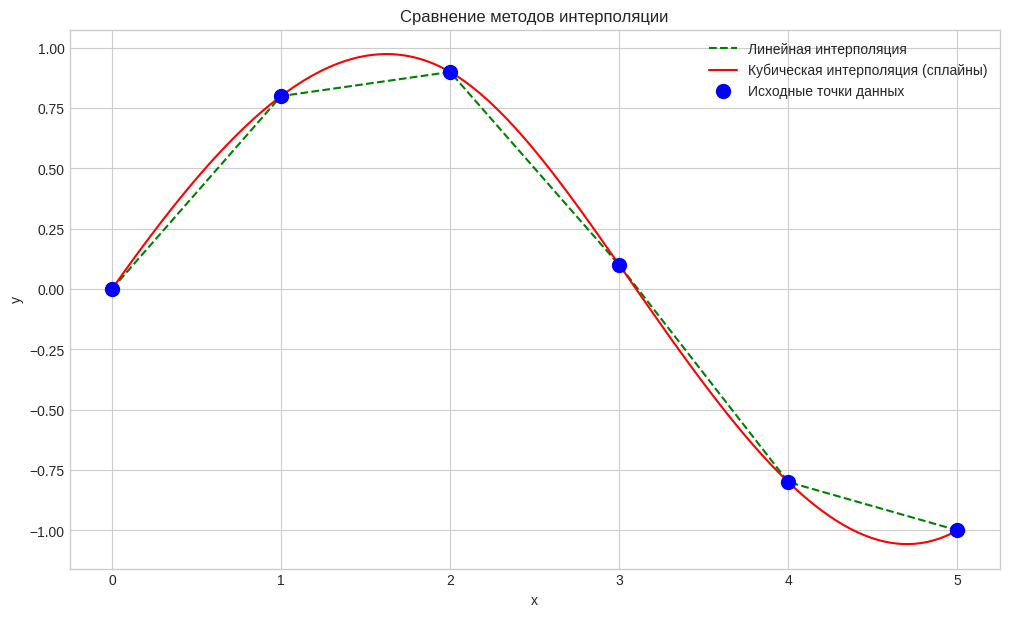

Предсказание для x = 2.5:
  - Линейная интерполяция: y ≈ 0.5000
  - Кубическая интерполяция:  y ≈ 0.5750


In [3]:
# Наши "измеренные" точки
x_points = np.array([0, 1, 2, 3, 4, 5])
y_points = np.array([0, 0.8, 0.9, 0.1, -0.8, -1.0])

# Создаем интерполяционные функции
f_linear = interp1d(x_points, y_points, kind='linear')
f_cubic = interp1d(x_points, y_points, kind='cubic')

# Создаем более плотную сетку X для построения гладких кривых
x_dense = np.linspace(0, 5, 200)

# Получаем значения Y с помощью интерполяции
y_linear = f_linear(x_dense)
y_cubic = f_cubic(x_dense)

# Визуализация
plt.figure(figsize=(12, 7))
plt.plot(x_dense, y_linear, 'g--', label='Линейная интерполяция')
plt.plot(x_dense, y_cubic, 'r-', label='Кубическая интерполяция (сплайны)')
plt.plot(x_points, y_points, 'bo', markersize=10, label='Исходные точки данных')

plt.title('Сравнение методов интерполяции')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Пример предсказания
x_predict = 2.5
y_linear_predict = f_linear(x_predict)
y_cubic_predict = f_cubic(x_predict)

print(f"Предсказание для x = {x_predict}:")
print(f"  - Линейная интерполяция: y ≈ {y_linear_predict:.4f}")
print(f"  - Кубическая интерполяция:  y ≈ {y_cubic_predict:.4f}")